Multiple Linear Regression Practical Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# drop unnecessary column

df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
# visualization time

import seaborn as sns

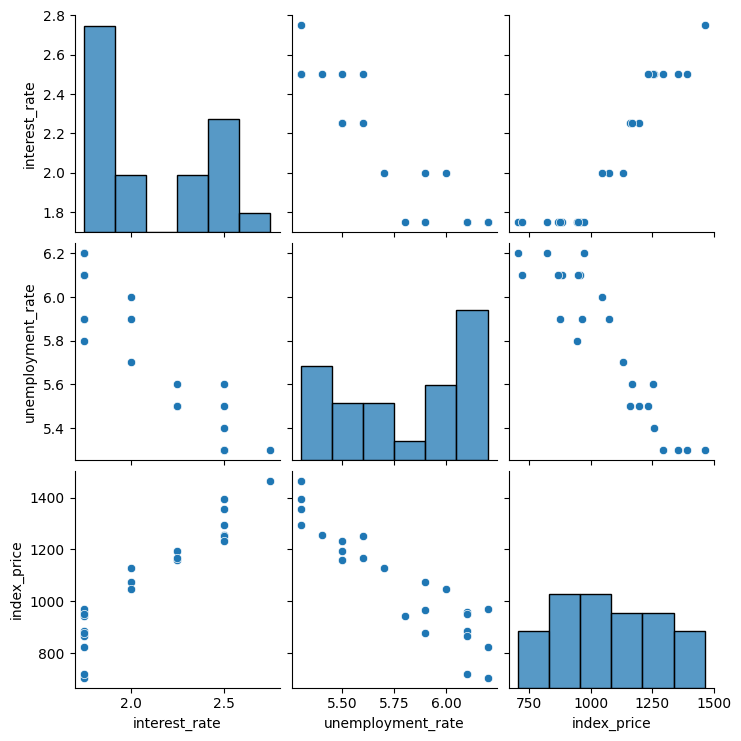

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

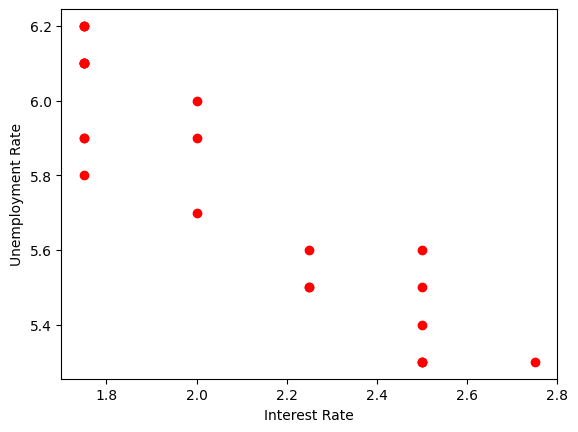

In [10]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='red')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [14]:
# independent feature and dependent feature

X=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [15]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

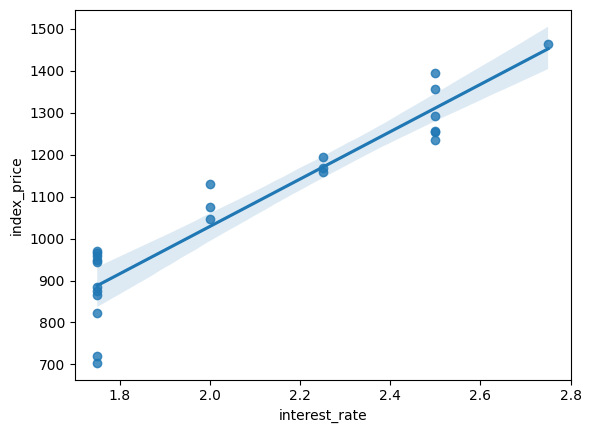

In [21]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

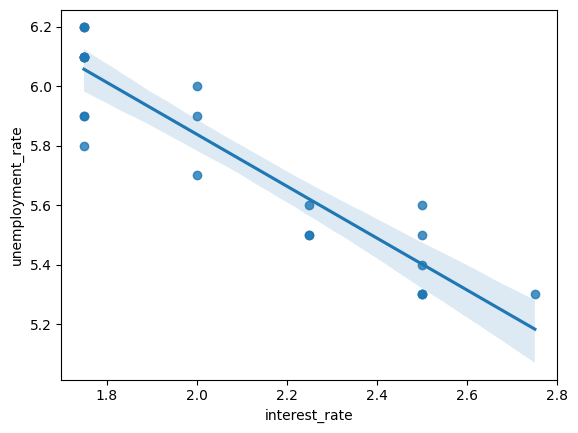

In [22]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

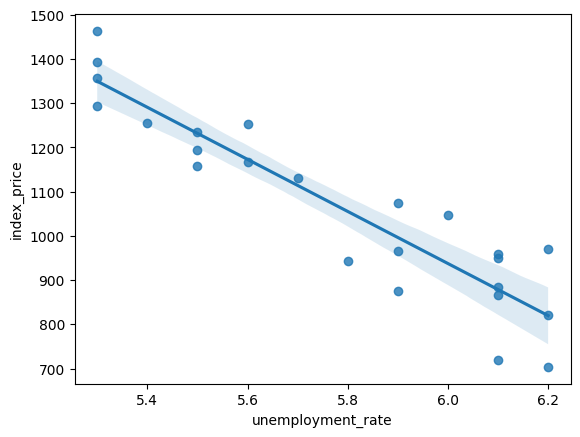

In [23]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [27]:
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
## prediction for test data
y_pred=regression.predict(X_test)

In [29]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

0.8278978091457145


Assumptions

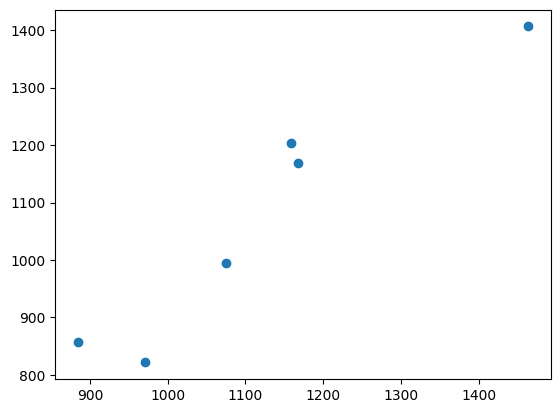

In [31]:
plt.scatter(y_test, y_pred)

In [32]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


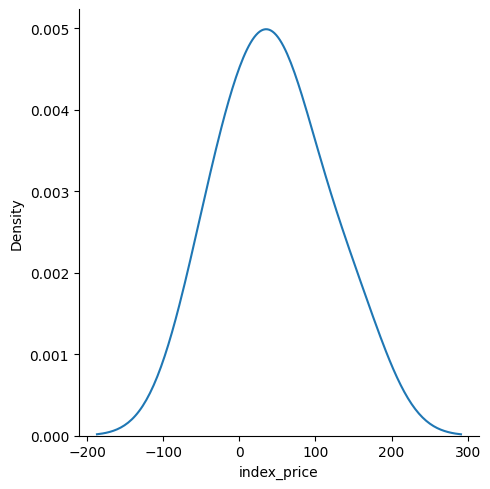

In [33]:
sns.displot(residuals, kind='kde')

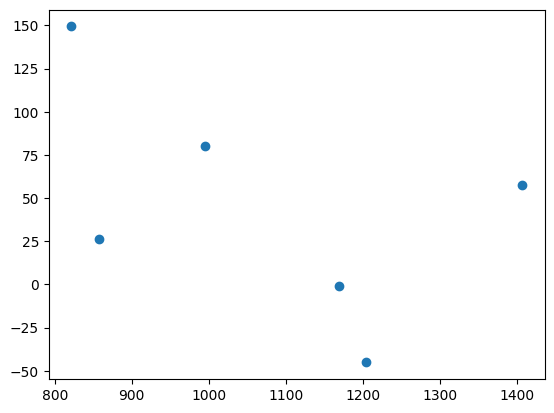

In [34]:
plt.scatter(y_pred, residuals)